# OCR(Optical Character Recognition) = Text detection + Text recognition
* OCR은 크게 문자의 영역을 검출하는 Text detection과 검출된 영역의 문자를 인식하는 Text recognition으로 구분됨.

[OCR 관련 논문](https://arxiv.org/pdf/1811.06193.pdf)
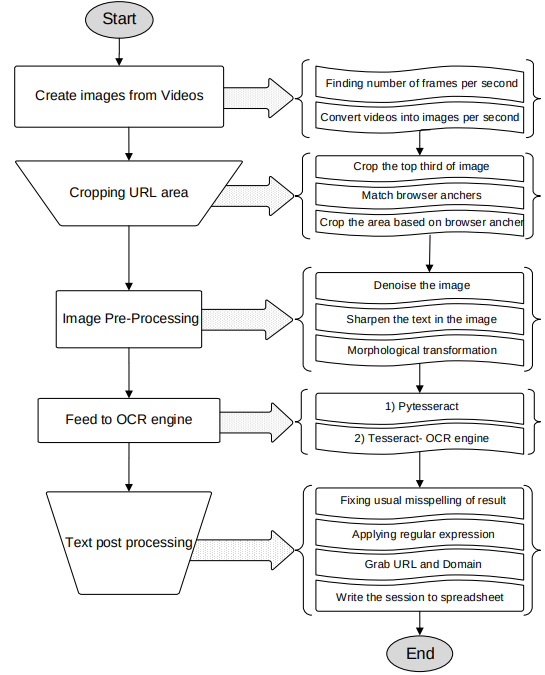

* OCR 엔진으로 Tesseract OCR을 사용함.
* 크게 5단계로 나뉘어 있는데, 위 3단계는 입력 이미지 추출과 전처리, 4번째 단계는 OCR 처리, 마지막 5번째 단계는 OCR의 출력 텍스트의 후처리로 구성됨.

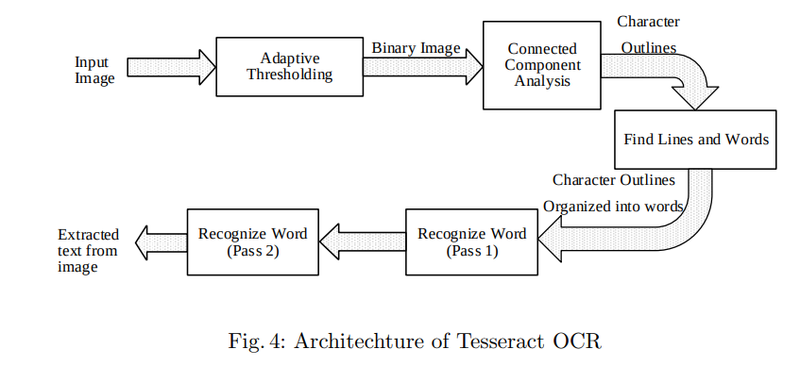

* Tesseract OCR을 통한 4단계의 과정을 나타낸 그림.
* Adaptive Thresholding 단계에서 입력 영상의 이진화를 통해 흑백으로 변환 후 Connected Component Analysis 단계에서 문자 영역을 검출해서 Find Lines and Words에서 라인 또는 단어 단위를 추출함.
* 이후 Recognize Word 단계에서 단어(Word) 단위 이미지를 Text로 변환하기 위해 문자를 하나씩 인식하고 다시 결합하는 과정을 거침.

## Text Detection
* 일반적인 Object detection 태스크를 문자 찾아내기로 확장한 버전.
* Object detection 기법뿐 아니라 Segmentation 기법도 동원되며, 문자가 가지는 독특한 특성까지 고려한 형태로 지속적으로 발전함.

### Regression
* [관련 논문](https://arxiv.org/pdf/1611.06779.pdf)
* 단어들은 가로로 길기 때문에 Aspect ratio(종횡비)가 크기 때문에 몇 가지 변형을 주게 되는데요, 기존의 SSD에서는 Regression을 위한 Convolution layer에서 3x3 크기의 kernel을 가짐.
* 긴 단어의 Feature를 활용하기 위해서 1x5로 convolution filter를 정의하여 사용하고 Anchor box의 aspect ratio를 1, 2, 3, 5, 7로 만들고, 이에 vertical offset을 적용하여 세로 방향으로 촘촘한 단어의 배열에 대응하도록 함.

### Segmentation
* [관련 논문](https://arxiv.org/pdf/1801.01315.pdf)
* 문자들은 매우 촘촘히 배열되어있으니 글자 영역으로 찾아낸 뒤에 이를 분리해내는 작업이나 연결하는 작업을 더 해서 원하는 최소단위로 만들어 주어야 함.
* PixelLink는 Text 영역을 찾아내는 segmentation과 함께, 글자가 어느 방향으로 연결되는지를 같이 학습하여 Text 영역 간의 분리 및 연결을 할 수 있는 정보를 추가적으로 활용함.
* PixelLink의 전체적인 구조는 U-Net과 유사하지만 output으로 총 9가지의 정보를 얻음.
* output 중 하나는 Text/non-text Prediction을 위한 class segmentation map으로 해당 영역이 Text인지 Non-text인지 예측값을 의미하는 2개의 커널을 가짐.
* 인접한 pixel이 중심 pixel과 단어 단위로 연결된 pixel인지, 아니면 분리된 pixel인지 알 수 있으므로, 문자 영역이 단어 단위로 분리된 Instance segmentation이 가능해짐.

### CRAFT
* CRAFT는 문자(Character) 단위로 문자의 위치를 찾아낸 뒤, 이를 연결하는 방식을 Segmentation 기반으로 구현한 방법.
* 문자의 영역을 boundary로 명확히 구분하지 않고, 가우시안 분포를 따르는 원형의 score map을 만들어서 배치시키는 방법으로 문자의 영역을 학습함.
### Pyramid Mask Text Detector
* PMTD는 Mask 정보가 부정확한 경우를 반영하기 위해서 Soft-segmentation을 활용함.
* PMTD(Pyramid Mask Text Detector)는 Mask-RCNN의 구조를 활용하여 먼저 Text영역을 Region proposal network로 찾음.
* 그다음 Box head에서 더 정확하게 regression 및 classification을 하고 Mask head에서 Instance의 Segmentation을 하는 과정을 거침.
* PMTD는 단어의 사각형 배치 특성을 반영하여 피라미드 형태의 Score map을 활용함.

## Text Recognition
* 검출된 영역의 문자가 무엇인지를 인식해 내는 과정.
* ext detection을 통해 검출된 문자 영역 속에는 MNIST 데이터처럼 문자 단위로 잘 분리된 텍스트 이미지만 담겨 있는 것이 아님!!
* 문자는 몇 개가 모여서 단어 혹은 문장을 이루고 있어서 이미지 내에서 문자를 검출해낼 때엔 검출하기 위한 최소 단위를 정해야함.
* 문장 또는 단어 단위로 찾아낼 경우, 엄청나게 긴 단어나 문장과 함께 짧은 길이도 찾아낼 수 있도록 해야함.

### Unsegmented Data
* 분리에 드는 비용이 많이 들거나 어려워 Segmentation이 되어있지 않은 데이터를 Unsegmented data라고 함.
* 주요한 특징 중 하나는 segment되어 있지 않은 하위 데이터들끼리 시퀀스(sequence)를 이루고 있다는 것.
* 이를 위해 CNN(Convolutional neural network)과 RNN(Recurrent neural network)을 같이 쓰는 CRNN을 사용.

### CRNN
* 문자 이미지에서 정보를 추출하기 위해서는 Feature Extractor가 필요한데 Feature Extractor로 사용되는 CNN 기반의 VGG 또는 ResNet과 같은 네트워크로부터 문자의 정보를 가진 Feature를 얻어낼 수 있음.
* 추출된 Feature를 Map-To-Sequence를 통해 Sequence 형태의 feature로 변환한 후, 다양한 길이의 Input을 처리할 수 있는 RNN으로 넣음.
* RNN이 Feature로부터 문자를 인식하기 위해서는 문자 영역처럼 넓은 정보가 필요하기 때문에, LSTM으로 구성함.
* 뒤의 정보가 필요하기 때문에 이를 Bidirectional로 구성해서 Bidirectional LSTM을 사용함.
* Bidirectional LSTM을 사용해 step마다 나오는 결과는 Transcription Layer에서 문자로 변환됨.

### CTC
* CTC는 Unsegmented data와 같이 Input과 Output이 서로 다른 Length의 Sequence를 가질 때, 이를 Align 없이 활용하는 방법임.
* CRNN에서는 Step마다 Fully Connected Layer의 logit을 Softmax 함수에 넣어줌으로써 어떤 문자일 확률을 알 수 있음.
* 이 결과 그대로를 문자로 변환하면 24자의 sequence를 보게 됨.
* CRNN에서는 Unsegmented Data를 위해 CTC(Connectionist Temporal Classification)를 활용함.
* Label Encode에서 이렇게 같은 문자를 구분하기 위한 Blank를 중복된 라벨 사이를 구분하기 위해 넣음.

### TPS
* Thin Plate Spline (TPS) Transformation
* Thin plate spline은 control point를 정의하고 해당 point들이 특정 위치로 옮겨졌을 때, 축 방향의 변화를 interpolation하여 모든 위치의 변화를 추정함.
* 이를 통해서 전체 이미지 pixel의 변화를 control point로 만들어낼 수 있음.
* Spatial Transformer Network를 통해서 Control point가 얼마나 움직여야 하는지 예측하는 네트워크를 아래 그림과 같이 Recognition model 앞단에 붙여 입력 이미지를 정방향으로 맞춰 PS 연산은 미분 가능한 연산이기 때문에 이 모듈을 Recognition model 앞단에 붙여서 학습을 바로 함.

## Text Recognition + Attention
### Attention sequence prediction
* Attention기반의 sequence prediction은 문장의 길이를 고정하고, 입력되는 Feature에 대한 Attention을 기반으로 해당 글자의 Label을 prediction함.
* 첫 번째 글자에서 입력 feature에 대한 Attention을 기반으로 label을 추정하고, 추정된 label을 다시 입력으로 사용하여 다음 글자를 추정해내는 방식인 것.
* 빈자리가 문제는 미리 정해둔 Token을 사용함. 이 Token에는 처음에 사용되는 "start" token과 끝에 사용되는 "end" token이 있으며 예외처리나 공백을 위한 token을 만들어서 사용하기도 함.

### Transformer
* Transformer도 Recognition 모델에 활용되기도 함.
* [관련 논문](https://arxiv.org/pdf/1904.01375v1.pdf)에서는 Irregular text를 잘 인식하기 위해서 2d space에 대한 attention을 활용하여 문자를 인식하기 위해 Transformer를 활용함.
* Transformer는 Query, Key, Value라는 개념을 통해서 Self-Attention을 입력으로부터 만듦.
* 이를 통해서 입력에서 중요한 Feature에 대해 Weight를 주고 Attention의 핵심은 Decoder의 현재 포지션에서 중요한 Encoder의 State에 가중치가 높게 매겨지는 것임.